In [1]:
import numpy as np
import nibabel as nib
from dipy.viz import regtools
from dipy.align.imaffine import (transform_centers_of_mass,
                                 AffineMap,
                                 MutualInformationMetric,
                                 AffineRegistration)
from dipy.align.transforms import (TranslationTransform3D,
                                   RigidTransform3D,
                                   AffineTransform3D)

In [18]:
static_nii = nib.load("/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/dhcp-volumetric-atlas-groupwise/mean/ga_39/template_t1.nii")
static = static_nii.get_fdata()
static_grid2world = static_nii.affine

In [19]:
mask_atlas_nii = nib.load("/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/dhcp-volumetric-atlas-groupwise/mean/ga_39/mask.nii")
mask_atlas = mask_atlas_nii.get_fdata().astype(np.bool)

In [20]:
static[~mask_atlas] = 0
#regtools.plot_slices(static)

In [21]:
moving_nii = nib.load("/Users/noeedc/Documents/Stage2021/data/HIE_baby_021/Mag_corrected.nii")
moving = moving_nii.get_fdata()
mask_nii = nib.load('/Users/noeedc/Documents/Stage2021/data/HIE_baby_021/MEDI_results/results_readme/Mask.nii')
mask = mask_nii.get_fdata().astype(np.bool)
moving[~mask] = 0
moving_grid2world = moving_nii.affine 

# Rotation de la matrice affine
# ornt = np.array([[0, 1], [1, -1], [2, 1]])
# moving_grid2world = moving_nii.as_reoriented(ornt).affine

In [22]:
identity = np.eye(4)
affine_map = AffineMap(identity, static.shape, static_grid2world, moving.shape, moving_grid2world)
resampled = affine_map.transform(moving)

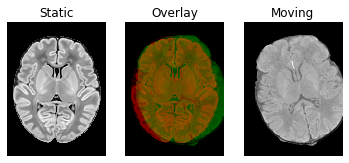

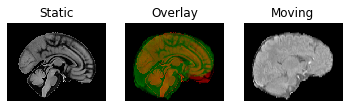

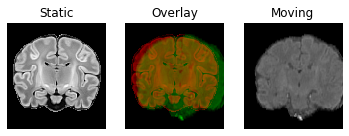

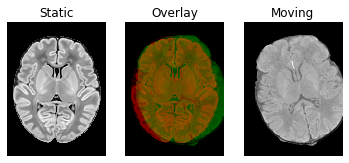

In [23]:
regtools.overlay_slices(static, resampled, None, 0,
                        "Static", "Moving")
regtools.overlay_slices(static, resampled, None, 1,
                        "Static", "Moving")
regtools.overlay_slices(static, resampled, None, 2,
                        "Static", "Moving")

In [24]:
c_of_mass = transform_centers_of_mass(static, static_grid2world, moving, moving_grid2world)

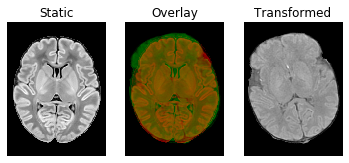

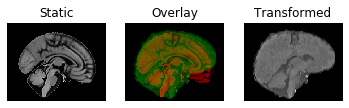

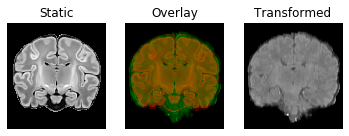

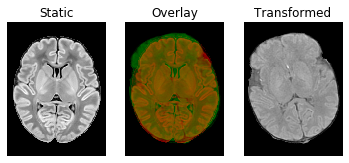

In [25]:
transformed = c_of_mass.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed")

In [26]:
nbins = 32
sampling_prop = None
metric = MutualInformationMetric(nbins, sampling_prop)

In [27]:
level_iters = [10000, 1000, 100]
sigmas = [3.0, 1.0, 0.0]
factors = [4, 2, 1]
affreg = AffineRegistration(metric=metric,level_iters=level_iters,sigmas=sigmas,factors=factors)

In [28]:
transform = TranslationTransform3D()
params0 = None
starting_affine = c_of_mass.affine
translation = affreg.optimize(static, moving, transform, params0,static_grid2world, moving_grid2world, starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


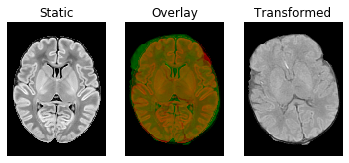

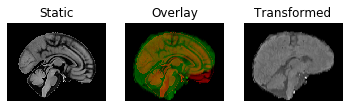

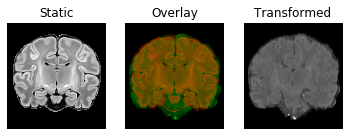

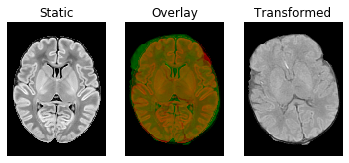

In [29]:
transformed = translation.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed")

In [30]:
transform = RigidTransform3D()
params0 = None
starting_affine = translation.affine
rigid = affreg.optimize(static, moving, transform, params0,
                        static_grid2world, moving_grid2world,
                        starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


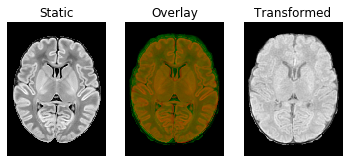

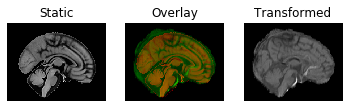

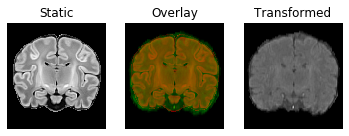

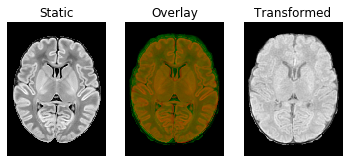

In [31]:
transformed = rigid.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed")

In [32]:
transform = AffineTransform3D()
params0 = None
starting_affine = rigid.affine
affine = affreg.optimize(static, moving, transform, params0,
                         static_grid2world, moving_grid2world,
                         starting_affine=starting_affine)

Optimizing level 2 [max iter: 10000]
Optimizing level 1 [max iter: 1000]
Optimizing level 0 [max iter: 100]


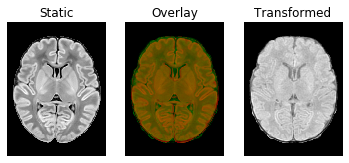

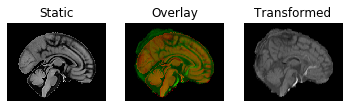

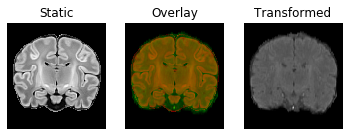

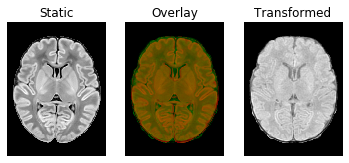

In [33]:
transformed = affine.transform(moving)
regtools.overlay_slices(static, transformed, None, 0,
                        "Static", "Transformed")
regtools.overlay_slices(static, transformed, None, 1,
                        "Static", "Transformed"
regtools.overlay_slices(static, transformed, None, 2,
                        "Static", "Transformed")

In [35]:
# Save nifti image
img = nib.Nifti1Image(transformed, static_nii.affine, header =static_nii.header )
nib.save(img, "/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/results/dipy/HIE_21_mask_affine.nii")  

In [37]:
# Save affine transformation
with open('/Users/noeedc/Documents/Stage2021/stage_noee2021/registration/results/dipy/affine_mask_trans.txt', 'w') as f:
    f.write(str(affine))